## Questions for Natalia:
- when do these disease arise?
- when are they usually diagnosed?
- is this reflected in the dataset? Or shall it reflect more the world population?

# Health data sharing is caring

In [1]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import cm

## Load data

The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions

From: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T

In [2]:
# Import file
df = pd.read_csv('HAM10000_metadata.csv', encoding='utf-8')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


## Load world population data

In [3]:
df_comp = pd.read_csv('Copy_PopulationAgeSex-20191020104736.csv', encoding='utf-8')
df_comp.head()

,Sex,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,Combined,670674,644706,615946,601644,597563,609086,550414,500480,487733,...,340945,294050,216166,153429,114720,70755,36351,12920,2790,417
1,Female,324426,311370,297197,290910,290007,297822,270534,247008,241397,...,172316,150610,113307,82435,64521,41933,23211,9009,2087,332
2,Male,346247,333336,318749,310734,307555,311265,279880,253472,246335,...,168629,143440,102859,70994,50199,28822,13141,3911,703,85


## Plot histograms: Age and sex

## Female&male

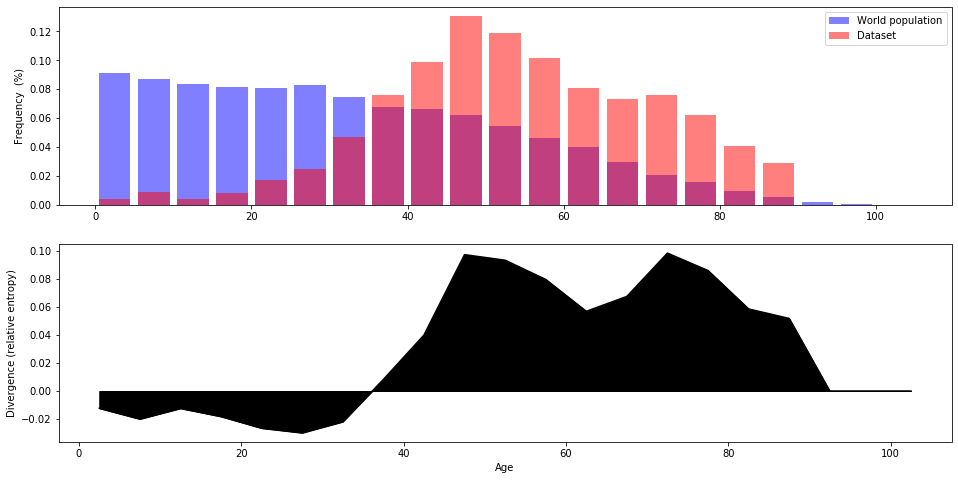

In [4]:
plt.figure(figsize=(16,8))
ax = plt.subplot(211)

counts, bins = np.histogram(df['age'], bins=np.arange(0,106,5), density=False) #Dataset histogram
freq_D = counts/counts.sum() #dataset frequency
freq_W = df_comp.iloc[0][1:]/df_comp.iloc[0][1:].sum() #world frequency
range = bins[:-1]+2.5 #range for plotting

ax.bar(range, freq_W, color='b', width=4, alpha=.5, label='World population') #Plot World
ax.bar(range, freq_D, color='r', width=4, alpha=.5, label='Dataset') #Plot Dataset

ax.set_ylabel('Frequency  (%)'), plt.legend()

ax2 = plt.subplot(212)

KL = [i * np.log(i/j) for i, j in zip(freq_D, freq_W) if i > 0 and j > 0] #avoid 0
idx = np.where(freq_D == 0)[0]
[KL.insert(i, 0) for i in idx] #fill with 0
ax2.plot(range, KL, color='k') #plot
ax2.fill_between(range, KL, color='k')
ax2.set_ylabel('Divergence (relative entropy)')

ax2.set_xlabel('Age')

plt.show()

Divergence between distributions

In [5]:
np.sum(KL)

0.5958751122421347

## Female

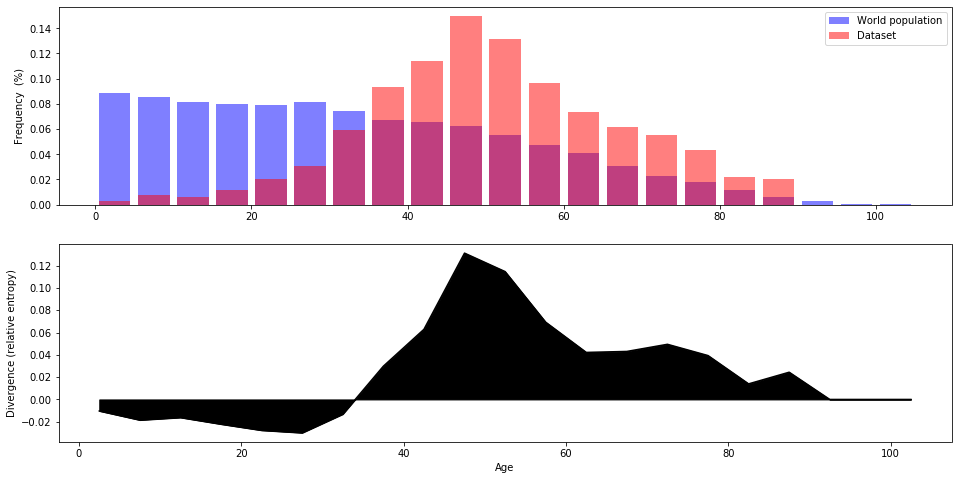

In [6]:
plt.figure(figsize=(16,8))
ax = plt.subplot(211)

counts, bins = np.histogram(df[df['sex']=='female']['age'],
                            bins=np.arange(0,106,5), density=False) #Dataset histogram
freq_D = counts/counts.sum() #dataset frequency
freq_W = df_comp.iloc[1][1:]/df_comp.iloc[1][1:].sum() #world frequency - female
range = bins[:-1]+2.5 #range for plotting

ax.bar(range, freq_W, color='b', width=4, alpha=.5, label='World population') #Plot World
ax.bar(range, freq_D, color='r', width=4, alpha=.5, label='Dataset') #Plot Dataset

ax.set_ylabel('Frequency  (%)'), plt.legend()

ax2 = plt.subplot(212)

KL = [i * np.log(i/j) for i, j in zip(freq_D, freq_W) if i > 0 and j > 0] #avoid 0
idx = np.where(freq_D == 0)[0]
[KL.insert(i, 0) for i in idx] #fill with 0
ax2.plot(range, KL, color='k') #plot
ax2.fill_between(range, KL, color='k')
ax2.set_ylabel('Divergence (relative entropy)')

ax2.set_xlabel('Age')

plt.show()

Divergence between distributions

In [7]:
np.sum(KL)

0.48213470223088695

## Male

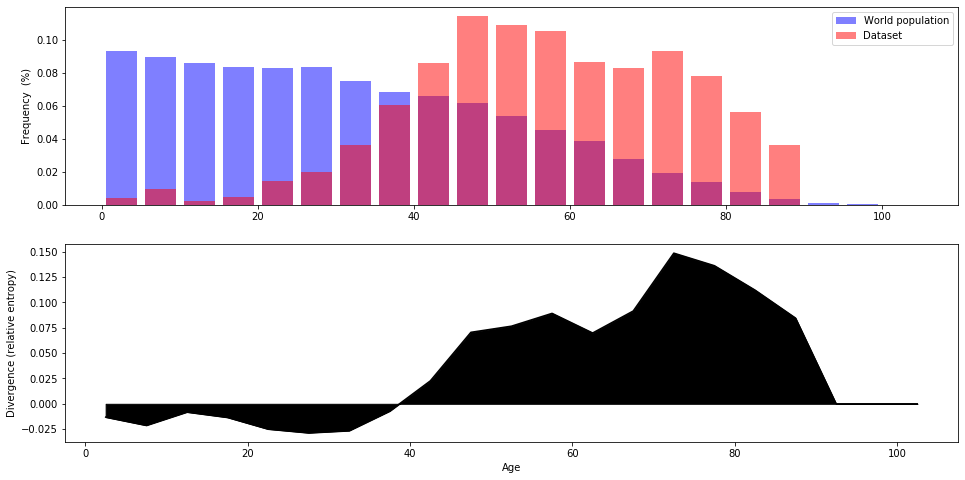

In [8]:
plt.figure(figsize=(16,8))
ax = plt.subplot(211)

counts, bins = np.histogram(df[df['sex']=='male']['age'],
                            bins=np.arange(0,106,5), density=False) #Dataset histogram
freq_D = counts/counts.sum() #dataset frequency
freq_W = df_comp.iloc[2][1:]/df_comp.iloc[2][1:].sum() #world frequency - female
range = bins[:-1]+2.5 #range for plotting

ax.bar(range, freq_W, color='b', width=4, alpha=.5, label='World population') #Plot World
ax.bar(range, freq_D, color='r', width=4, alpha=.5, label='Dataset') #Plot Dataset

ax.set_ylabel('Frequency  (%)'), plt.legend()

ax2 = plt.subplot(212)

KL = [i * np.log(i/j) for i, j in zip(freq_D, freq_W) if i > 0 and j > 0] #avoid 0
idx = np.where(freq_D == 0)[0]
[KL.insert(i, 0) for i in idx] #fill with 0
ax2.plot(range, KL, color='k') #plot
ax2.fill_between(range, KL, color='k')
ax2.set_ylabel('Divergence (relative entropy)')

ax2.set_xlabel('Age')

plt.show()

Divergence between distributions

In [9]:
np.sum(KL)

0.7590726976306856

## Trials - old code

In [10]:
#plt.figure(figsize=(16,8))
#ax = plt.subplot(111)
#ax.plot(np.linspace(0,100, 21), df_comp.iloc[0][1:]/df_comp.iloc[0][1:].sum(), linestyle='', marker='o', color='k', label='both')

#ax.bar(np.linspace(0, 100, 21)+2.5, df_comp.iloc[0][1:]/df_comp.iloc[0][1:].sum(),
#       color='k', width=4, alpha=.5, label='World population')

#counts, bins = np.histogram(df['age'], bins=np.arange(0,101,5), density=False)

#ax.bar(bins[:-1]+2.5, counts/counts.sum(),
#       color='k', width=4, alpha=1, label='Dataset')

#df['age'].hist(bins=np.arange(0,101,5), grid=False, density=True)
#plt.show()

#hist, bin_edges = np.histogram(df['age'], bins=np.linspace(0, 100, 21), density=True)

#A = plt.hist(df['age'], bins=np.linspace(0, 100, 21), density=True)

#pd.DataFrame.hist(df, column='age', grid=False,
#                  xlabelsize=None, xrot=None, ylabelsize=None, yrot=None,
#                  ax=ax, sharex=True, bins=np.linspace(0, 100, 21),
#                  density=True, color='k', label='dataset')

#plt.legend()
#plt.show()